# Numerically Solving Some Classical Models

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


## Ising model 

### Defining the free energy and its derivatives 

In [2]:
def f_x(m, T):
    return m-np.tanh(m/T)

def f_xx(m,T):
    return 1-(1-(np.tanh(m/T))**2)/T 

def stability_condition2(m,T):
    return True if f_xx(m,T) > 0 else False

### Defining the equations of state and the stability condition 

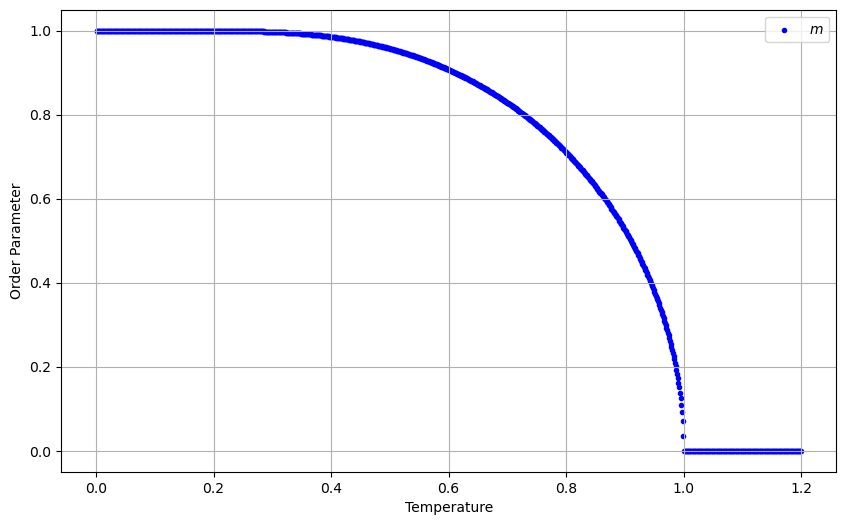

In [4]:
# Solve for a range of temperatures
T_vals = np.linspace(0.001, 1.2, 1000)
m_vals = []

for t in T_vals:
    sol = fsolve(lambda m: f_x(m,t), [10,10])  # Initial guess [0, 0]
    m_vals.append(sol[0])

m_stable=[]
T_stable=[]

for i in range(len(T_vals)): 
    if  stability_condition2(m_vals[i],T_vals[i]): 
        m_stable.append(m_vals[i])
        T_stable.append(T_vals[i])

# Plot
fig3=plt.figure(figsize=(10, 6))
plt.scatter(T_stable, m_stable, label=r'$m$', color='blue',s=9)
plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()


## Potts Model

In [5]:
def f_x(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_x."""
    exp1 = np.exp(m_x/T)
    exp2 = np.exp(- m_x / (2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y / (2*T))
    
    numerator = exp1 - exp2 * cosh_term
    denominator = exp1 + 2 * exp2 * cosh_term
    
    return 3/2 * m_x - numerator / denominator

def f_y(m, T): #C
    m_x,m_y=m
    """Calculate the first derivative f_y."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3) * m_y /(2*T))
    
    numerator = np.sqrt(3) * sinh_term
    denominator = exp1 + 2 * cosh_term

    return 3/2 * m_y -  numerator / denominator

def f_xx(m_x, m_y, T): #C
    """Calculate the second derivative f_xx."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator=exp1*(-3+4*T)*cosh_term + T*(2+exp2+2*cosh_term)
    denominator=exp1+2*cosh_term

    return (3/(2*T)) * (numerator / denominator**2)

def f_yy(m_x, m_y, T):
    """Calculate the second derivative f_yy."""
    exp1 = np.exp(3*m_x/(2*T))
    exp2 = np.exp(3*m_x/T)
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    
    numerator= 3*(-2+ T*(2+exp2) + exp1*(-1+4*T)*cosh_term+2*T*cosh_term)
    denominator=2*T*(exp1+2*cosh_term)**2

    
    return 3/2 - numerator / denominator

def f_xy(m_x, m_y, T): #C
    """Calculate the second derivative f_xy."""
    exp1 = np.exp(3*m_x/(2*T))
    cosh_term = np.cosh(np.sqrt(3) * m_y /(2*T))
    sinh_term = np.sinh(np.sqrt(3)* m_y /(2*T))
    
    numerator= 3*np.sqrt(3)*exp1*sinh_term
    denominator=2*T*(exp1+2*cosh_term)**2
    
    return numerator/denominator


### Defining the equations of state and the stability condition 

Now $(m_x,m_y)$ must satisfy the following set of conditions in order to minimize $f(m_x,m_y,t)$ 
$$f_x(m_x,m_y, t)=0, \quad f_y(m_x,m_y, t)=0, $$
$$f_{xx}(m_x,m_y, t)\cdot f_{yy}(m_x,m_y, t) - (f_{xy}(m_x,m_y, t))^2 > 0, \quad \textrm{and} \quad f_{xx}(m_x,m_y, t) >0.$$

/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_4771/1212269225.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [m_x_vals[-1],m_y_vals[-1]] if m_x_vals else [0.6, 0.3], xtol=1e-12)  # Initial guess [0, 0]
/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_4771/1212269225.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [m_x_vals[-1],m_y_vals[-1]] if m_x_vals else [0.6, 0.3], xtol=1e-12)  # Initial guess [0, 0]


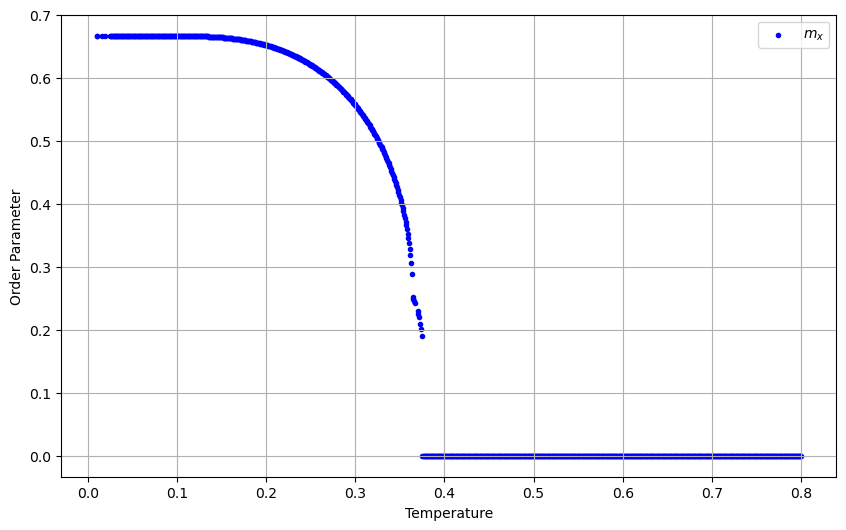

In [8]:
def stability_condition(m_x, m_y, T): 
    return True if f_xx(m_x, m_y, T)*f_yy(m_x, m_y, T) - (f_xy(m_x, m_y, T))**2>0 and f_xx(m_x, m_y, T) > 0 else False  

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 0.8, 1000)
m_x_vals = []
m_y_vals = []

for t in T_vals:
    sol = fsolve(lambda m: [f_x(m, t), f_y(m, t)], [m_x_vals[-1],m_y_vals[-1]] if m_x_vals else [0.6, 0.3], xtol=1e-12)  # Initial guess [0, 0]
    m_x_vals.append(sol[0])
    m_y_vals.append(sol[1]) 


m_x_stable=[]
m_y_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_condition(m_x_vals[i],m_y_vals[i],T_vals[i]):
        m_x_stable.append(m_x_vals[i]) 
        m_y_stable.append(m_y_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig1=plt.figure(figsize=(10, 6))

plt.scatter(T_stable, m_x_stable, label=r'$m_x$', color='blue',s=9)


plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True)
plt.show()

## Maier Saupe Model 

The free energy is now: 

$$f(t,S,\eta)=\frac{3}{4}S^2 + \frac{\eta^2}{4}-t\ln 2 - t\ln \left[ e^{-\frac{3}{4}\frac{S+\eta}{t}}+e^{\frac{3}{4}\frac{\eta-S}{t}}+e^{\frac{3}{2}\frac{S}{t}}\right]$$

In [15]:
def free_energy(t,S,n):
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp(-(3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t)

    return 3*(S**2)/4 + (n**2)/4 - t*np.log(2) - t*np.log(exp_1+exp_2+exp_3)

def f_S(t,S,n): #C
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp((3/4)*(3*S+n)/t)

    common_term=1+exp_1 
    num= 9*common_term 
    denom= common_term + exp_2 
    
    return (3/2)*(S-1) + num/(4*denom)

def f_n(t,S,n): #C
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp((3/4)*(3*S+n)/t)


    num= 3-3*exp_1  
    denom= 4*(1 + exp_1  + exp_2) 
    
    return num/denom + n/2 

"""
def f_SS(t,S,n): #C
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp((3/4)*(3*S+n)/t)
    common_term=1+exp_1  

    num = 8*exp_2*t + 8*t*common_term**2 + exp_2*common_term*(16*t-27)  
    denom = t*(common_term +exp_2)**2 
    
    return (3/16)*num/denom 

def f_nn(t,S,n): #C
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp((3/4)*(3*S+n)/t)
    common_term=1+exp_1 

    num= -36*exp_1-9*exp_2*common_term
    denom= t*(common_term +exp_2)**2 

    return (1/16)*(8+num/denom) 

def f_Sn(t,S,n):#C
    exp_1=np.exp((3/2)*n/t)
    exp_2=np.exp((3/4)*(3*S+n)/t)
    common_term=1+exp_1 

    num= exp_2*(-1+exp_1)
    denom= t*(common_term +exp_2)**2 
    
    return (27/16)*num/denom  


def stability_check(S, n, T): 
    return True if f_SS(S, n, T)*f_nn(S, n, T) - (f_Sn(S, n, T))**2 > 0 and f_SS(S, n, T) > 0 else False  
"""


'\ndef f_SS(t,S,n): #C\n    exp_1=np.exp((3/2)*n/t)\n    exp_2=np.exp((3/4)*(3*S+n)/t)\n    common_term=1+exp_1  \n\n    num = 8*exp_2*t + 8*t*common_term**2 + exp_2*common_term*(16*t-27)  \n    denom = t*(common_term +exp_2)**2 \n    \n    return (3/16)*num/denom \n\ndef f_nn(t,S,n): #C\n    exp_1=np.exp((3/2)*n/t)\n    exp_2=np.exp((3/4)*(3*S+n)/t)\n    common_term=1+exp_1 \n\n    num= -36*exp_1-9*exp_2*common_term\n    denom= t*(common_term +exp_2)**2 \n\n    return (1/16)*(8+num/denom) \n\ndef f_Sn(t,S,n):#C\n    exp_1=np.exp((3/2)*n/t)\n    exp_2=np.exp((3/4)*(3*S+n)/t)\n    common_term=1+exp_1 \n\n    num= exp_2*(-1+exp_1)\n    denom= t*(common_term +exp_2)**2 \n    \n    return (27/16)*num/denom  \n\n\ndef stability_check(S, n, T): \n    return True if f_SS(S, n, T)*f_nn(S, n, T) - (f_Sn(S, n, T))**2 > 0 and f_SS(S, n, T) > 0 else False  \n'

In [16]:

def log_sum_exp(arg): 
    
    max_arg= np.max(arg)

    return max_arg + np.log(np.sum(np.exp(np.array(arg) - max_arg))) 
"""
def f_S(t,S,n): #C

    exp_1=(3/2)*n/t
    exp_2=(3/4)*(3*S+n)/t

    #Apply smooth log-sum-exp
    log_sum_exp1 = log_sum_exp(exp_1)
    log_sum_exp2 = log_sum_exp(exp_2)

    common_term= 1 + np.exp(exp_1-log_sum_exp1) 
    num= 9*common_term 
    denom= common_term + np.exp(exp_2-log_sum_exp2)  
    
    return (3/2)*(S-1) + num/(4*denom)

def f_n(t,S,n): #C
    exp_1=(3/2)*n/t
    exp_2=(3/4)*(3*S+n)/t

    #Apply smooth log-sum-exp
    log_sum_exp1 = log_sum_exp(exp_1)
    log_sum_exp2 = log_sum_exp(exp_2)


    num= 3-3*np.exp(exp_1-log_sum_exp1) 
    denom= 4*(1 + np.exp(exp_1-log_sum_exp1)  + np.exp(exp_2-log_sum_exp2)) 
    
    return num/denom + n/2 
"""

def f_SS(t, S, n):
    exp_1 = (3/2)*n/t
    exp_2 = (3/4)*(3*S+n)/t
    
    # Apply smooth log-sum-exp
    log_sum_exp1 = log_sum_exp(exp_1)
    log_sum_exp2 = log_sum_exp(exp_2)

    common_term = 1 + np.exp(exp_1 - log_sum_exp1)
    exp_2_term = np.exp(exp_2 - log_sum_exp2)

    num = 8*exp_2_term*t + 8*t*common_term**2 + exp_2_term*common_term*(16*t - 27)
    denom = t*(common_term + exp_2_term)**2
    
    return (3/16) * num / denom

def f_nn(t, S, n):
    exp_1 = (3/2)*n/t
    exp_2 = (3/4)*(3*S+n)/t

    # Apply smooth log-sum-exp
    log_sum_exp1 = log_sum_exp(exp_1)
    log_sum_exp2 = log_sum_exp(exp_2) 

    common_term = 1 + np.exp(exp_1 - log_sum_exp1)
    exp_2_term = np.exp(exp_2 - log_sum_exp2)

    num = -36*np.exp(exp_1 - log_sum_exp1) - 9*exp_2_term*common_term
    denom = t*(common_term + exp_2_term)**2

    return (1/16) * (8 + num / denom)

def f_Sn(t, S, n):
    exp_1 = (3/2)*n/t
    exp_2 = (3/4)*(3*S+n)/t

    # Apply smooth log-sum-exp
    log_sum_exp1 = log_sum_exp(exp_1)
    log_sum_exp2 = log_sum_exp(exp_2) 

    common_term = 1 + np.exp(exp_1 - log_sum_exp1)
    exp_2_term = np.exp(exp_2 - log_sum_exp2)

    num = exp_2_term * (-1 + np.exp(exp_1 - log_sum_exp1))
    denom = t * (common_term + exp_2_term)**2

    return (27/16) * num / denom

def stability_check(S, n, T): 
    return True if f_SS(S, n, T)*f_nn(S, n, T) - (f_Sn(S, n, T))**2 > 0 and f_SS(S, n, T) >0 else False  


/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_69132/484844159.py:9: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda x : [f_S(t,x[0],x[1]), f_n(t,x[0],x[1])], [S_vals[-1],n_vals[-1]] if S_vals else [0.8, 0.0],xtol=1e-12)


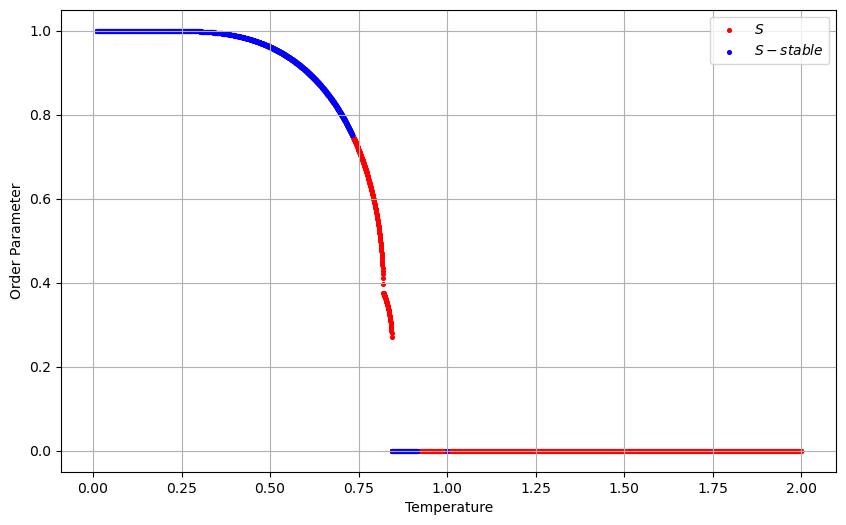

In [ ]:
# Solve for a range of temperatures
T_vals = np.linspace(0.01, 2, 5000)

S_vals = []
n_vals = []

for t in T_vals:
    
    sol = fsolve(lambda x : [f_S(t,x[0],x[1]), f_n(t,x[0],x[1])], [S_vals[-1],n_vals[-1]] if S_vals else [0.8, 0.0], xtol=1e-12) 
    
    S_vals.append(sol[0])
    n_vals.append(sol[1]) 

S_stable=[]
n_stable=[] 
T_stable=[]

for i in range(len(T_vals)): 
    if stability_check(S_vals[i],n_vals[i],T_vals[i]):
        S_stable.append(S_vals[i]) 
        n_stable.append(n_vals[i]) 
        T_stable.append(T_vals[i]) 



# Plot
fig4=plt.figure(figsize=(10, 6))


plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S-stable$', color='blue',s=7)


#plt.scatter(T_vals, n_vals, label=r'$\eta$', color='red',s=8)
#plt.scatter(T_stable, n_stable, label=r'$\eta-stable$', color='blue',s=8)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 

plt.show()

### Trying out a new method 


/var/folders/1q/ck574qds4v36l1t2j4jftvq80000gn/T/ipykernel_74346/3590956849.py:29: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  sol = fsolve(lambda x : [f_S(t,x[0],n=0)], [S_vals[-1]] if S_vals else [1.0], xtol=1e-12)


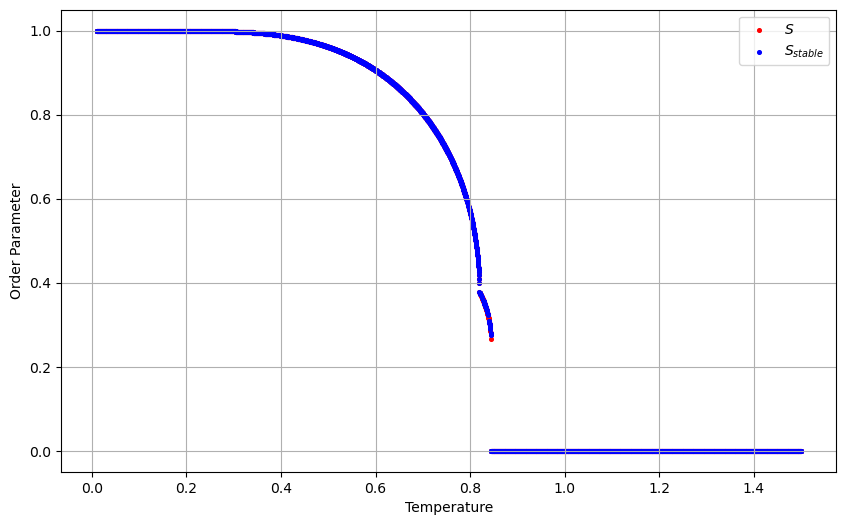

In [2]:
def f_S(t,S,n): 
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp((-3/4)*(S+n)/t)
    exp_3=np.exp((3/4)*(-S+n)/t)
    
    num= exp_1
    denom= exp_1+exp_2+exp_3 
    
    return S+(1/2)-(3/2)*num/denom

def f_SS(t,S):

    exp_1=np.exp((9/4)*S/t)
     
    denom1 = 2*t*(2+exp_1)**2
    denom2 = 8*t +4*exp_1*t 

    return 1 + 27/denom1 - 27/denom2

def stability_check(t, S): 
    return True if f_SS(t, S) > 0 else False
   

# Solve for a range of temperatures
T_vals = np.linspace(0.01, 1.5, 5000)
S_vals = []

for t in T_vals:
    sol = fsolve(lambda x : [f_S(t,x[0],n=0)], [S_vals[-1]] if S_vals else [1.0], xtol=1e-12) 
    S_vals.append(sol[0])

S_stable=[]
T_stable=[]

for i in range(len(T_vals)): 
    if stability_check(T_vals[i],S_vals[i]):
        S_stable.append(S_vals[i]) 
        T_stable.append(T_vals[i]) 

# Plot
fig4=plt.figure(figsize=(10, 6))

plt.scatter(T_vals, S_vals, label=r'$S$', color='red',s=7)
plt.scatter(T_stable, S_stable, label=r'$S_{stable}$', color='blue',s=7)

plt.xlabel('Temperature')
plt.ylabel('Order Parameter')
plt.legend()
plt.grid(True) 
plt.show()
fig4.savefig(fname='Stable_Result')


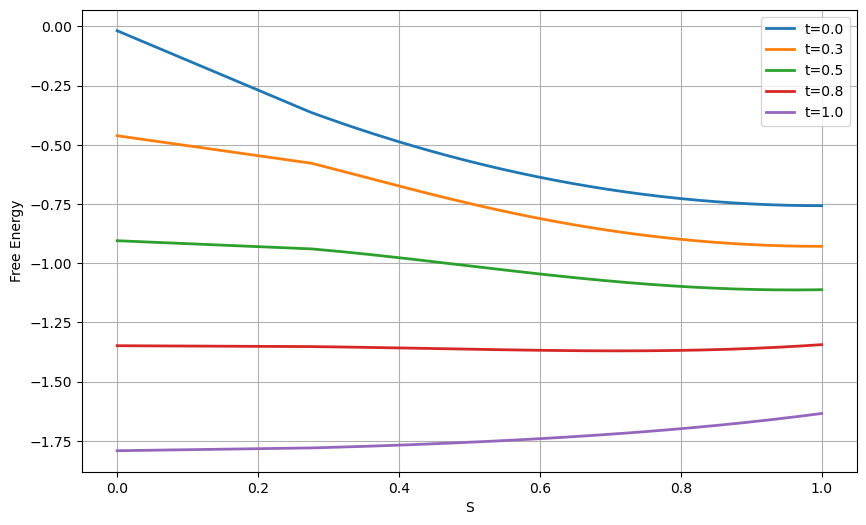

In [3]:
def free_energy(t,S):
    t = np.array(t, dtype=float)  # Ensure t is a numpy array of floats
    S = np.array(S, dtype=float)  # Ensure S is a numpy array of floats
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp(-(3/4)*(S)/t)
    exp_3=np.exp((3/4)*(-S)/t)

    return 3*(S**2)/4 - t*np.log(2) - t*np.log(exp_1+exp_2+exp_3) 


t_sample=np.linspace(0.01, 1.0, 5)

fig=plt.figure(figsize=(10, 6))

for t_val in t_sample: 
    
    energy_val=np.zeros_like(S_stable) 
    
    for i,s in enumerate(S_stable):

        energy_val[i]=free_energy(t_val, s)
    
    # Plot the curves
    plt.plot(S_stable, energy_val, linewidth=2, label=f't={t_val:.1f}')

# Plot settings
plt.xlabel('S')
plt.ylabel('Free Energy')
plt.grid(True)
plt.legend()
plt.show()


In [20]:
def free_energy(t,S):
    t = np.array(t, dtype=float)  # Ensure t is a numpy array of floats
    S = np.array(S, dtype=float)  # Ensure S is a numpy array of floats
    exp_1=np.exp((3/2)*S/t)
    exp_2=np.exp(-(3/4)*(S)/t)
    exp_3=np.exp((3/4)*(-S)/t)

    return 3*(S**2)/4 - t*np.log(2) - t*np.log(exp_1+exp_2+exp_3)  

for i in range(5): 
    print(f'-----------\n Initial Free Energy: {free_energy(t=0.0001,S=0.0001)} \n Present Free Energy: {free_energy(t=T_stable[2*i],S=S_stable[2*i])} \n----------- ')

-----------
 Initial Free Energy: -0.00023843521978554805 
 Present Free Energy: -0.7569314718055995 
----------- 
-----------
 Initial Free Energy: -0.00023843521978554805 
 Present Free Energy: -0.757344670164885 
----------- 
-----------
 Initial Free Energy: -0.00023843521978554805 
 Present Free Energy: -0.7577578685241706 
----------- 
-----------
 Initial Free Energy: -0.00023843521978554805 
 Present Free Energy: -0.7581710668834563 
----------- 
-----------
 Initial Free Energy: -0.00023843521978554805 
 Present Free Energy: -0.7585842652427418 
----------- 


In [6]:
import scipy
from scipy.differentiate import hessian 

ModuleNotFoundError: No module named 'scipy.differentiate'